# Airline Analysis

This project will investigate and try to understand how airline prices change based on different factors and get insights about the data.

The goal is to prepare data, analyse the data with plots, and find conclusions.

The data includes:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

## Import Python Modules

First import the modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Loading Data

To first understand the data, lets load the data and see an overview. Here, the data `flight.csv` will be loaded on `flight`.

In [2]:
## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


Now, lets show the mean and median of the data, and plot them to better understand the data about flights.

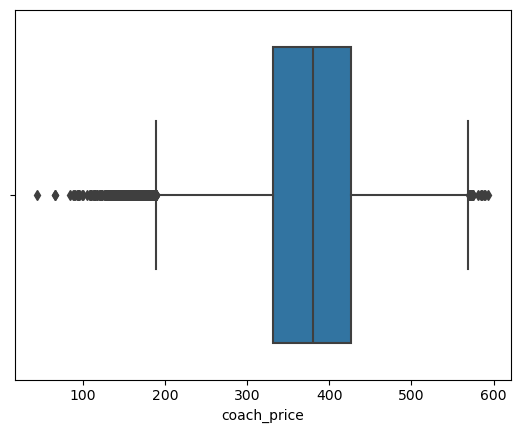

mean:  376.58525308213905


/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


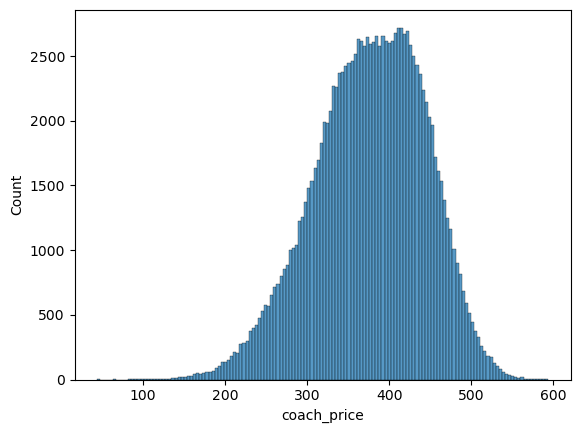

median:  380.56


<Figure size 640x480 with 0 Axes>

In [4]:
sns.boxplot(x='coach_price', data=flight)
plt.show()
plt.clf()
mean = np.mean(flight.coach_price)
print('mean: ', mean)

sns.histplot(x='coach_price', data=flight)
plt.show()
plt.clf()
median = np.median(flight.coach_price)
print('median: ', median)

Now, lets visualize the flights that are 8 eight hours long. To better understand how prices are distributed. 

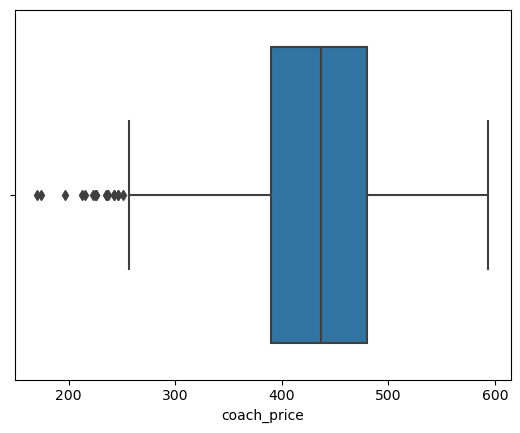

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


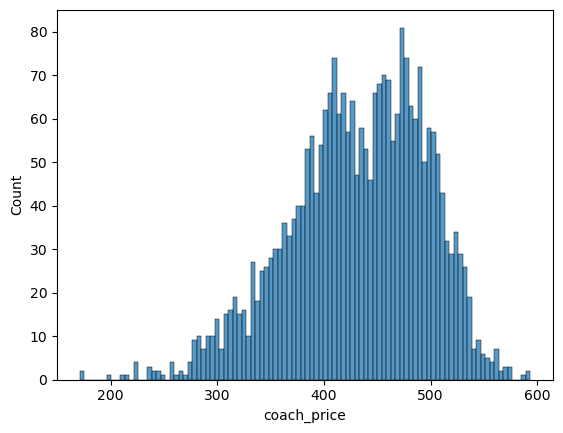

431.834377372817
437.115


<Figure size 640x480 with 0 Axes>

In [5]:
## Take the flights that are eight hours long and plot them.
flights_eight_hours = flight[flight.hours == 8]

sns.boxplot(x=flights_eight_hours.coach_price)
plt.show()
plt.clf()

sns.histplot(flights_eight_hours.coach_price, bins=100)
plt.show()
plt.clf()

print(np.mean(flights_eight_hours.coach_price))
print(np.median(flights_eight_hours.coach_price))


In this step, lets understand how often there are large delays when connecting a flight. Are the delays typical? As we can see below, the more common delays are of 10 minutes and the delays that extend more than 1000 minutes are special cases.

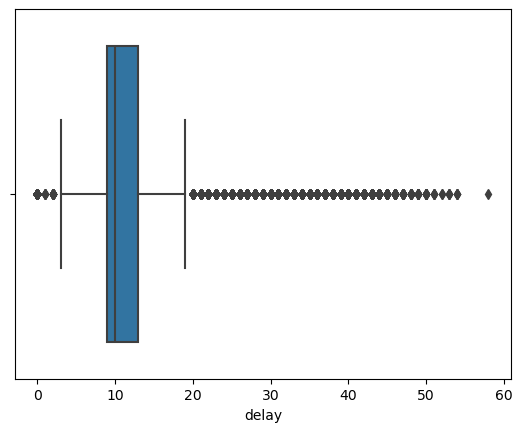

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


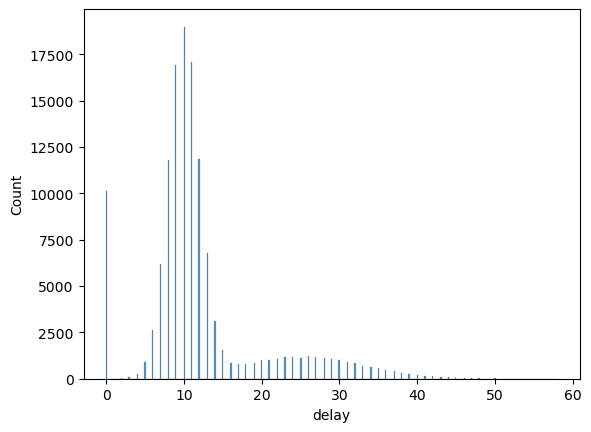

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


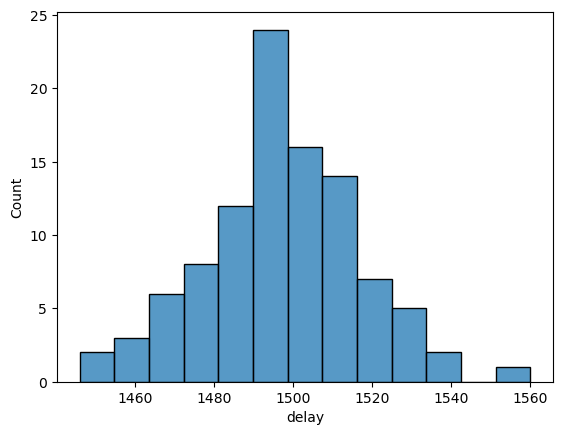

<Figure size 640x480 with 0 Axes>

In [6]:
## Plot delay on flights that are less than 1000 minutes and mroe than 1000 minutes.
sns.boxplot(x=flight[flight.delay < 1000].delay)
plt.show()
plt.clf()

sns.histplot(flight[flight.delay < 1000].delay)
plt.show()
plt.clf()

sns.histplot(flight[flight.delay > 1000].delay)
plt.show()
plt.clf()

## Bivariate Analysis

In this step, lets explore if higher coach prices mean higher first-class prices. According to the plot, there seem to be a relation

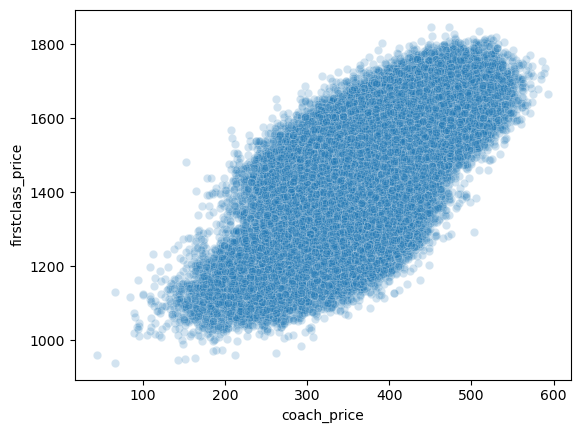

<Figure size 640x480 with 0 Axes>

In [7]:
## Scatter plot about coach prices and first class prices
sns.scatterplot(x=flight.coach_price, y=flight.firstclass_price, alpha = 0.2)
plt.show()
plt.clf()

perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

There data seems to cluttered, lets use a line plot to see more clearly if there is a relation. Also, lets reduce the amount of data that we are using to get more insights about the data.

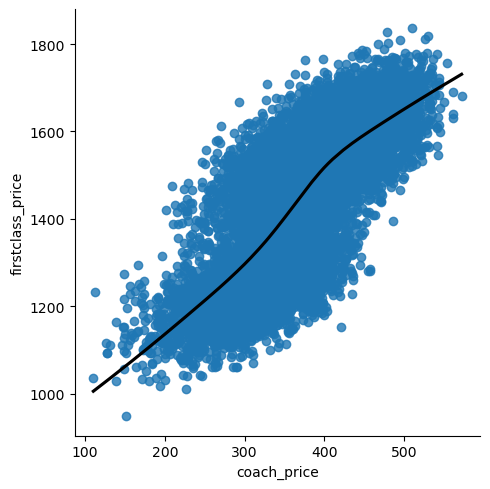

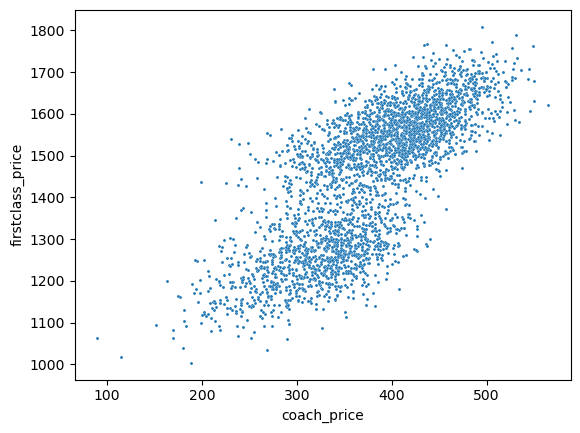

<Figure size 640x480 with 0 Axes>

In [8]:
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

# Taking a percentage of the population
perc = 0.025
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.scatterplot(x=flight_sub.coach_price, y=flight_sub.firstclass_price, s = 5)
plt.show()
plt.clf()

Now, lets compare if having an nflight meal, inflight entertainment, or inflight WiFi lead to a higher price. As we can see in the histogram below, the distribution of this services follow a similar pattern. This could mean that this services are usually served together.

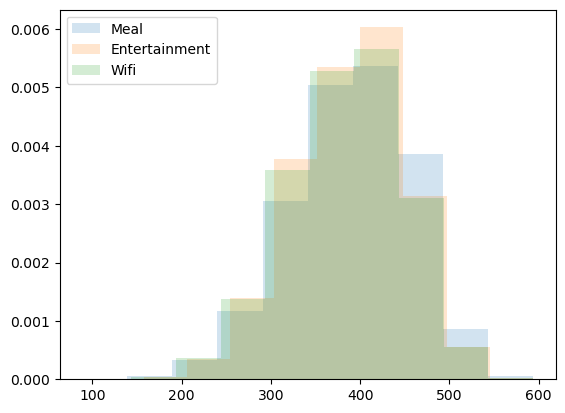

<Figure size 640x480 with 0 Axes>

In [12]:
plt.hist(flight.coach_price[flight.inflight_meal=='Yes'], label='Meal', density=True, alpha=.2)
plt.hist(flight.coach_price[flight.inflight_entertainment=='Yes'], label='Entertainment', density=True, alpha=.2)
plt.hist(flight.coach_price[flight.inflight_wifi=='Yes'], label='Wifi', density=True, alpha=.2)
plt.legend()
plt.show()
plt.clf()

Now, in each histogram below, we could also see that the flights having this types of services are not that common. Is more normal to not offer this. And we can also see that the distributions are similar, giving support to our theory that this services are served together.

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


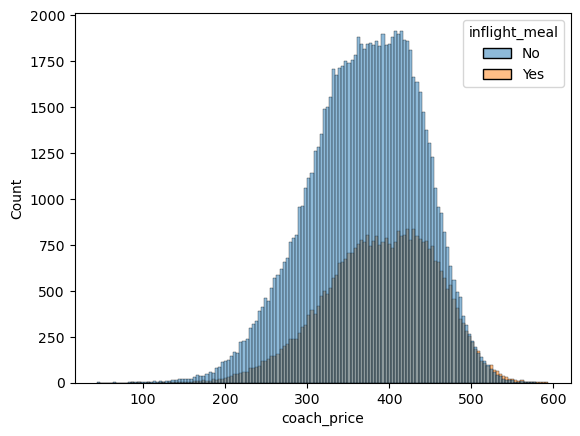

Mean of coach_price with meal:  390.09980701619315


/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


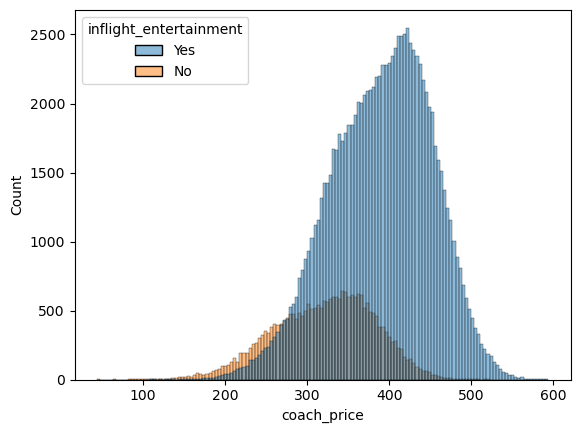

Mean of coach_price with entertainment:  390.48814924827946


/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


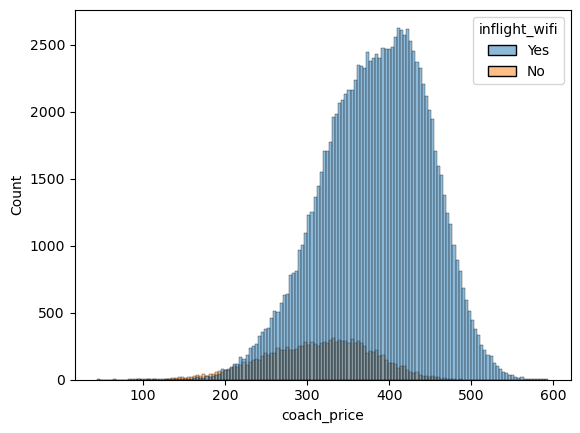

Mean of coach_price with wifi:  383.65137462960104


<Figure size 640x480 with 0 Axes>

In [14]:
sns.histplot(flight, x='coach_price', hue = flight.inflight_meal)
plt.show()
plt.clf()
print("Mean of coach_price with meal: ", np.mean(flight.coach_price[flight.inflight_meal=='Yes']))

sns.histplot(flight, x='coach_price', hue = flight.inflight_entertainment)
plt.show()
plt.clf()
print("Mean of coach_price with entertainment: ", np.mean(flight.coach_price[flight.inflight_entertainment=='Yes']))

sns.histplot(flight, x='coach_price', hue = flight.inflight_wifi)
plt.show()
plt.clf()
print("Mean of coach_price with wifi: ", np.mean(flight.coach_price[flight.inflight_wifi=='Yes']))

Lets see now the amount of passengers and its relation to the length of flights. From the plot below, we could infer that the amount of passengers reduce when the flight is between 6-8 hours.

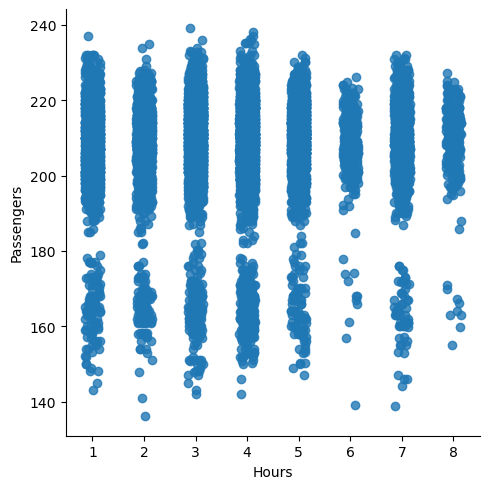

<Figure size 640x480 with 0 Axes>

In [20]:
## Passenger plots
sns.lmplot(x='hours', y='passengers', data = flight_sub, x_jitter = .15, y_jitter = .15, fit_reg = False)
plt.xlabel("Hours")
plt.ylabel("Passengers")
plt.show()
plt.clf()

Now, lets make another plot to see in a different way the amount of passengers on each flight. From the plot below, we again see that the flights that last 6 hours and 8 hours have a less amount of passengers.

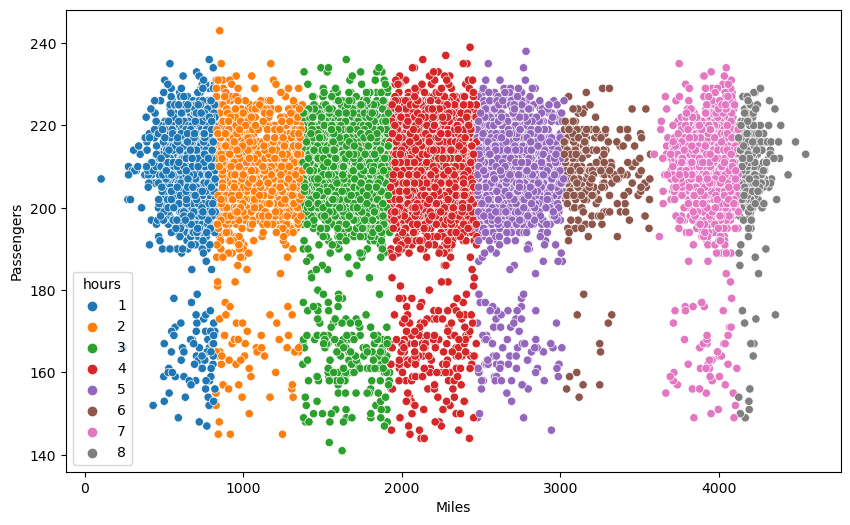

<Figure size 640x480 with 0 Axes>

In [17]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", 8)
sns.scatterplot(data=flight_sub, x='miles', y='passengers', hue='hours', hue_order=[1, 2, 3, 4, 5, 6, 7, 8], palette=palette)
plt.xlabel("Miles")
plt.ylabel("Passengers")
plt.show()
plt.clf()

## Multivariate Analysis

The plot below compares coach prices and first-class prices during the weekdays vs weekened. From the plot below we clearly see that the prices are greater when the flights are on the weekened. 

<Figure size 1000x600 with 0 Axes>

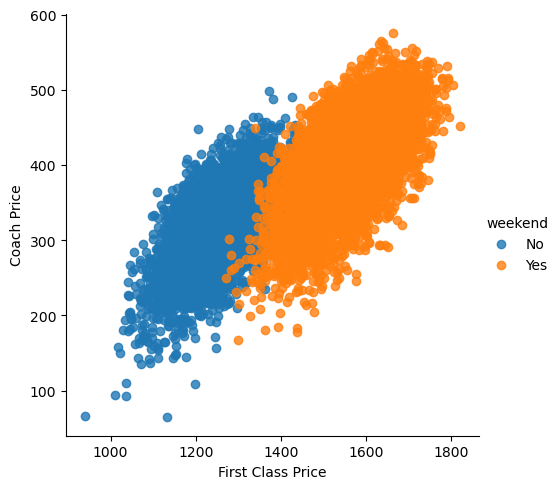

<Figure size 640x480 with 0 Axes>

In [19]:
# Coach prices and first-class prices for weekend vs weekdays
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

plt.figure(figsize=(10, 6))
sns.lmplot(x='firstclass_price', y='coach_price', data = flight_sub, hue='weekend', hue_order=['No', 'Yes'], x_jitter = .15, y_jitter = .15, fit_reg = False)
plt.xlabel("First Class Price")
plt.ylabel("Coach Price")
plt.show()
plt.clf()

For the final analysis, lets compare coach prices of redeyes vs non-redeyes (flight overnight?). 
From the plot below, we clearly see that the flights that are redeyes (overnight) are cheaper than the other flights, throughout all the week.

/var/folders/tx/971fklmn4yl_d4n9vyyy93yw0000gn/T/ipykernel_4160/3519192819.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = flight.groupby('day_of_week')
/var/folders/tx/971fklmn4yl_d4n9vyyy93yw0000gn/T/ipykernel_4160/3519192819.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.bar(no_readeyes, flight_redeye.groupby('day_of_week').coach_price.mean(), label='Red Eye')
/var/folders/tx/971fklmn4yl_d4n9vyyy93yw0000gn/T/ipykernel_4160/3519192819.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to re

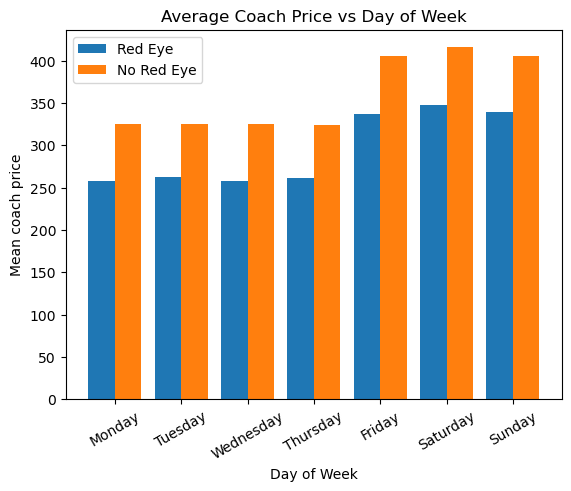

<Figure size 640x480 with 0 Axes>

In [22]:
def create_array(n, t, d, w):
    #     n = 1  This is our first dataset (out of 2)
    #     t = 2 Number of datasets
    #     d = 7 Number of sets of bars
    #     w = 0.8 Width of each bar
    return [t*element + w*n for element
                 in range(d)]

days_in_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert day_of_week to categorical type
flight['day_of_week'] = pd.Categorical(flight['day_of_week'], categories=days_in_order, ordered=True)

grouped = flight.groupby('day_of_week')

no_readeyes = create_array(1, 2, 7, 0.8) # for no redeyes, 2 datasets(no and yes redeyes) with...
                                         # 7 bars (7 days week) and a width of 0.8
readeyes = create_array(2, 2, 7, 0.8)
days = create_array(1.5, 2, 7, 0.8)

flight_redeye = flight[flight.redeye == 'Yes']
flight_noredeye = flight[flight.redeye == 'No']

plt.bar(no_readeyes, flight_redeye.groupby('day_of_week').coach_price.mean(), label='Red Eye')
plt.bar(readeyes, flight_noredeye.groupby('day_of_week').coach_price.mean(), label='No Red Eye')

ax = plt.subplot()
ax.set_xticks(days)
ax.set_xticklabels(days_in_order)
plt.xticks(rotation = 30)

plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Mean coach price')
plt.title('Average Coach Price vs Day of Week')

plt.show()
plt.clf()

And in the plot below, we again see that redeye flights are cheaper than other flights every day of the week

/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/joelmilla/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


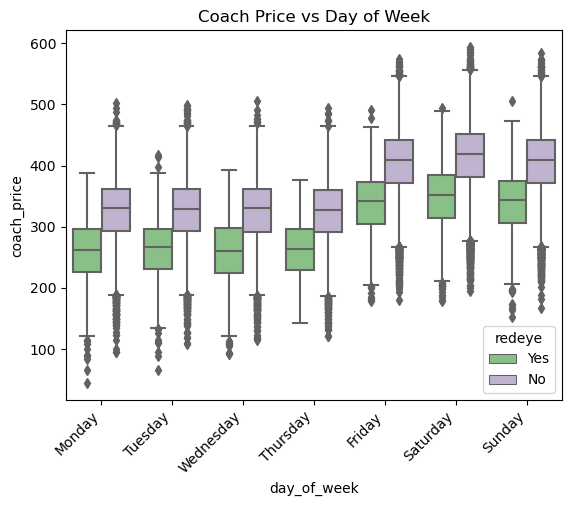

<Figure size 640x480 with 0 Axes>

In [27]:

sns.boxplot(x='day_of_week', y='coach_price', hue="redeye", data=flight, palette='Accent')
plt.title('Coach Price vs Day of Week')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

# Conclusion
This project was able to make a few data visualizations with the data and explore some interesting features.

The project was able to get insight about prices coach_prices vs first-class prices. Understand flights and the amount of passe